In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from Models.Hodgkin_Huxley import HodgkinHuxleyModel as HHM
from Models.Hodgkin_Huxley import simulations as sim 
%matplotlib inline

In [2]:
model = HHM.HH()
model.gNa = 120
model.gK = 36 
model.EK = -12 

In [3]:
stim = np.zeros(20000)
stim[7000:13000] = 50

In [4]:
sims = sim.Simulation(model=model)
sims.Run(stimulusWaveform=stim,stepSizeMs=0.01)

simulating 20000 time points...
simulation complete


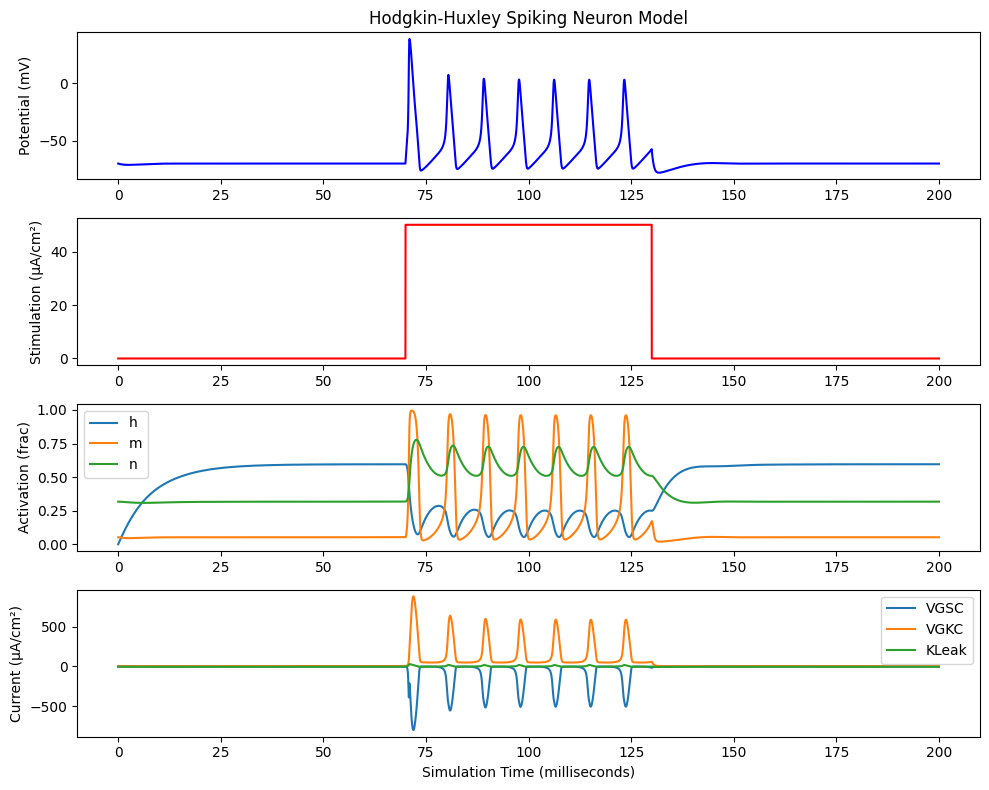

In [8]:
plt.figure(figsize=(10,8))
ax1 = plt.subplot(411)
ax1.plot(sims.times, sims.Vm - 70, color='b')
ax1.set_ylabel("Potential (mV)")
ax1.set_title("Hodgkin-Huxley Spiking Neuron Model")

ax2 = plt.subplot(412)
ax2.plot(sims.times, stim, color='r')
ax2.set_ylabel("Stimulation (µA/cm²)")

ax3 = plt.subplot(413, sharex=ax1)
ax3.plot(sims.times, sims.StateH, label='h')
ax3.plot(sims.times, sims.StateM, label='m')
ax3.plot(sims.times, sims.StateN, label='n')
ax3.set_ylabel("Activation (frac)")
ax3.legend()

ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(sims.times, sims.INa, label='VGSC')
ax4.plot(sims.times, sims.IK, label='VGKC')
ax4.plot(sims.times, sims.IKleak, label='KLeak')
ax4.set_ylabel("Current (µA/cm²)")
ax4.set_xlabel("Simulation Time (milliseconds)")
ax4.legend()
plt.tight_layout()
plt.show()